In [4]:
from scipy.signal import StateSpace, lti, lsim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

## Beispiel 1: Doppelintegrator
$$\dot{\textbf{x}} = \begin{bmatrix}0 & 1 \\ 0 & 0 \end{bmatrix} \textbf{x} + \begin{bmatrix}0 \\ 1 \end{bmatrix} u(t)$$
$$\textbf{y} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} \textbf{x}$$

<IPython.core.display.Javascript object>


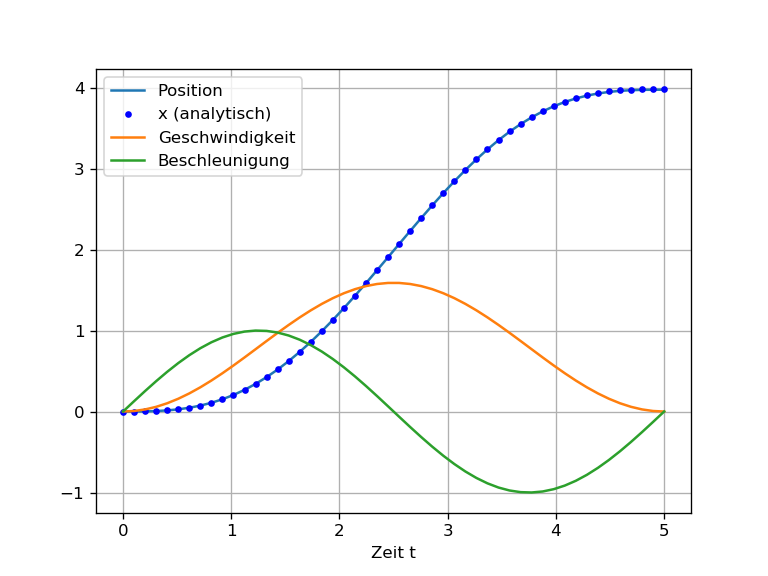

In [5]:
# System in Zustandsraumdarstellung

A = [[0., 1.],
     [0., 0.]]

B = [[0.], [1.]]

C = np.eye(2)

D = [[0.], [0.]]

system = lti(A, B, C, D)

T = 5
alpha = 1
t = np.linspace(0, T)
u = alpha * np.sin(2* np.pi * t / T)
tout, y, x = lsim(system, u, t)

x_analytisch = alpha * ((t*T)/(2*np.pi) - (T**2)/(4*np.pi**2) * np.sin(2* np.pi * t / T))

plt.plot(t, y[:,0], label="Position")
plt.plot(t, x_analytisch, 'bo', markersize=3, label="x (analytisch)")
plt.plot(t, y[:,1], label="Geschwindigkeit")
plt.plot(t, u, label="Beschleunigung")
plt.xlabel("Zeit t")
plt.legend()
plt.grid()
plt.show()

Der unbekanten Parameter $\alpha$ parametrisieren Eingang $u(\alpha,t,T) = \alpha \cdot \sin \left( \frac{2 \pi t}{T} \right)$. Mit den Anfangeswerten für $t_0 = 0$: $x(t_0) = 0$ und $\dot{x}(t_0) = 0$ ergibt sich nach zweifacher Integration für die Position: 
$$x(t) = \alpha \left[ \frac{T}{2 \pi} t - \frac{T^2}{4 \pi^2} \sin \left( \frac{2 \pi t}{T} \right) \right]$$
Gesucht ist die Funktion $F(T, x_T) \rightarrow \alpha$, welche den für einen vorgegeben Zielpunkt $x_T$ und Übergangsdauer $T$ benötigten Parameter $\alpha$ liefert. In analytischer Form kann sie in einfacher Weise aus der Gleichung für die Position bestimmt werden:  
$$\alpha = F(T, x_T) = \frac{2 \pi x_T}{T^2}$$

<IPython.core.display.Javascript object>


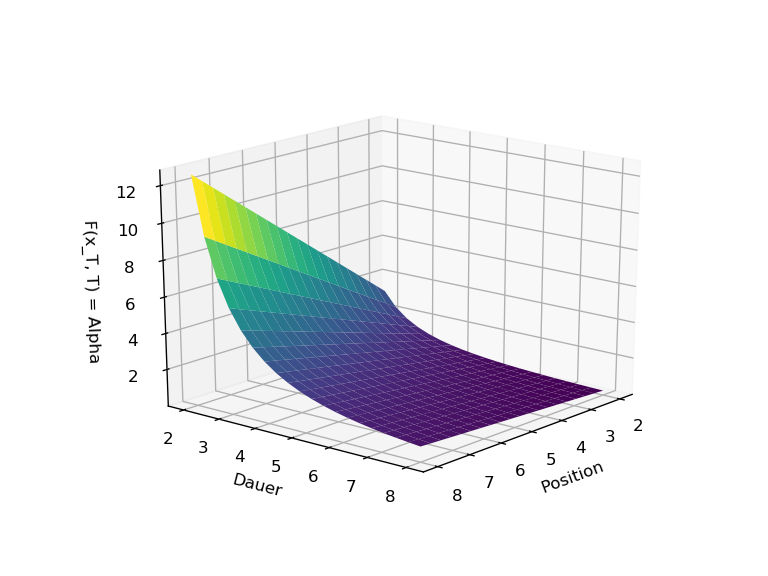

In [6]:
def F(x_T, T):
    return(2 * np.pi * x_T) / T**2

T = np.linspace(2, 8, 20)
x_T = np.linspace(2, 8, 20)

X, Y = np.meshgrid(x_T, T)

Z = F(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 40)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('Position')
ax.set_ylabel('Dauer')
ax.set_zlabel('F(x_T, T) = Alpha')
plt.show()

Statische Funktionsapproximation mittels eines LOLIMOTs (Local Linear Model Tree)